In [210]:
#Assignment 3: Final Project (PART-2)
#Name: Uday Bhaskar Valapadasu
#ID: 11696364

In [211]:
# Importing the necessary packages
import xgboost as xgb
import shap
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import warnings
# Suppress the FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

In [212]:
#Loading NCI_SEER_CRC.csv data

nci_df = pd.read_csv("NCI_SEER_CRC.csv")
nci_df

,Year of diagnosis,"Race recode (W, B, AI, API)","Origin recode NHIA (Hispanic, Non-Hisp)",Sex,Age recode with <1 year olds,Age recode with single ages and 100+,Primary Site - labeled,Grade (thru 2017),Combined Summary Stage (2004+),Total number of in situ/malignant tumors for patient,COD to site recode,Survival months,SEER registry (with CA and GA as whole states),Marital status at diagnosis,Appalachia,Behavior recode for analysis
0,2000,White,Non-Spanish-Hispanic-Latino,Male,80-84 years,82 years,C18.6-Descending colon,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,17,Kentucky,Married (including common law),1,Malignant
1,2000,White,Non-Spanish-Hispanic-Latino,Male,75-79 years,76 years,C18.0-Cecum,Moderately differentiated; Grade II,Blank(s),2,Lung and Bronchus,67,Kentucky,Unknown,1,Malignant
2,2000,White,Non-Spanish-Hispanic-Latino,Female,65-69 years,65 years,C18.0-Cecum,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,41,Kentucky,Unknown,1,Malignant
3,2000,White,Non-Spanish-Hispanic-Latino,Male,85+ years,86 years,C18.4-Transverse colon,Poorly differentiated; Grade III,Blank(s),2,Lung and Bronchus,15,Kentucky,Unknown,1,Malignant
4,2000,White,Non-Spanish-Hispanic-Latino,Female,80-84 years,82 years,C18.3-Hepatic flexure of colon,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,0,Kentucky,Unknown,1,Malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34013,2018,White,Non-Spanish-Hispanic-Latino,Female,85+ years,91 years,C18.1-Appendix,Blank(s),Regional,1,Alive,2,Kentucky,Widowed,0,Malignant
34014,2018,Black,Non-Spanish-Hispanic-Latino,Male,75-79 years,75 years,C18.0-Cecum,Blank(s),Regional,1,Alive,6,Kentucky,Single (never married),0,Malignant
34015,2018,White,Non-Spanish-Hispanic-Latino,Male,60-64 years,64 years,C18.0-Cecum,Blank(s),Regional,1,Alive,9,Kentucky,Divorced,0,Malignant
34016,2018,White,Non-Spanish-Hispanic-Latino,Female,75-79 years,76 years,C18.2-Ascending colon,Blank(s),Regional,1,Alive,3,Kentucky,Single (never married),0,Malignant


In [213]:
#Renaming the required columns

nci_df.rename(columns={
    'Year of diagnosis': 'YDD', 
    'Race recode (W, B, AI, API)': 'Race',
    'Age recode with single ages and 100+': 'Age', 
    'Grade (thru 2017)': 'Grade',
    'SEER registry (with CA and GA as whole states)': 'Location', 
    'Behavior recode for analysis': 'Diagnosis',
    'Marital status at diagnosis': 'MaritalStatus'
}, inplace=True)

nci_df

,YDD,Race,"Origin recode NHIA (Hispanic, Non-Hisp)",Sex,Age recode with <1 year olds,Age,Primary Site - labeled,Grade,Combined Summary Stage (2004+),Total number of in situ/malignant tumors for patient,COD to site recode,Survival months,Location,MaritalStatus,Appalachia,Diagnosis
0,2000,White,Non-Spanish-Hispanic-Latino,Male,80-84 years,82 years,C18.6-Descending colon,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,17,Kentucky,Married (including common law),1,Malignant
1,2000,White,Non-Spanish-Hispanic-Latino,Male,75-79 years,76 years,C18.0-Cecum,Moderately differentiated; Grade II,Blank(s),2,Lung and Bronchus,67,Kentucky,Unknown,1,Malignant
2,2000,White,Non-Spanish-Hispanic-Latino,Female,65-69 years,65 years,C18.0-Cecum,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,41,Kentucky,Unknown,1,Malignant
3,2000,White,Non-Spanish-Hispanic-Latino,Male,85+ years,86 years,C18.4-Transverse colon,Poorly differentiated; Grade III,Blank(s),2,Lung and Bronchus,15,Kentucky,Unknown,1,Malignant
4,2000,White,Non-Spanish-Hispanic-Latino,Female,80-84 years,82 years,C18.3-Hepatic flexure of colon,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,0,Kentucky,Unknown,1,Malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34013,2018,White,Non-Spanish-Hispanic-Latino,Female,85+ years,91 years,C18.1-Appendix,Blank(s),Regional,1,Alive,2,Kentucky,Widowed,0,Malignant
34014,2018,Black,Non-Spanish-Hispanic-Latino,Male,75-79 years,75 years,C18.0-Cecum,Blank(s),Regional,1,Alive,6,Kentucky,Single (never married),0,Malignant
34015,2018,White,Non-Spanish-Hispanic-Latino,Male,60-64 years,64 years,C18.0-Cecum,Blank(s),Regional,1,Alive,9,Kentucky,Divorced,0,Malignant
34016,2018,White,Non-Spanish-Hispanic-Latino,Female,75-79 years,76 years,C18.2-Ascending colon,Blank(s),Regional,1,Alive,3,Kentucky,Single (never married),0,Malignant


In [214]:
#Enumerate Diagnosis:

# Here, I have used map to replace the Maligant with 1 and any other sitution will be replaceed by 0
nci_df['Diagnosis'] = nci_df['Diagnosis'].map({'Malignant': 1}).fillna(0)
nci_df

,YDD,Race,"Origin recode NHIA (Hispanic, Non-Hisp)",Sex,Age recode with <1 year olds,Age,Primary Site - labeled,Grade,Combined Summary Stage (2004+),Total number of in situ/malignant tumors for patient,COD to site recode,Survival months,Location,MaritalStatus,Appalachia,Diagnosis
0,2000,White,Non-Spanish-Hispanic-Latino,Male,80-84 years,82 years,C18.6-Descending colon,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,17,Kentucky,Married (including common law),1,1
1,2000,White,Non-Spanish-Hispanic-Latino,Male,75-79 years,76 years,C18.0-Cecum,Moderately differentiated; Grade II,Blank(s),2,Lung and Bronchus,67,Kentucky,Unknown,1,1
2,2000,White,Non-Spanish-Hispanic-Latino,Female,65-69 years,65 years,C18.0-Cecum,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,41,Kentucky,Unknown,1,1
3,2000,White,Non-Spanish-Hispanic-Latino,Male,85+ years,86 years,C18.4-Transverse colon,Poorly differentiated; Grade III,Blank(s),2,Lung and Bronchus,15,Kentucky,Unknown,1,1
4,2000,White,Non-Spanish-Hispanic-Latino,Female,80-84 years,82 years,C18.3-Hepatic flexure of colon,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,0,Kentucky,Unknown,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34013,2018,White,Non-Spanish-Hispanic-Latino,Female,85+ years,91 years,C18.1-Appendix,Blank(s),Regional,1,Alive,2,Kentucky,Widowed,0,1
34014,2018,Black,Non-Spanish-Hispanic-Latino,Male,75-79 years,75 years,C18.0-Cecum,Blank(s),Regional,1,Alive,6,Kentucky,Single (never married),0,1
34015,2018,White,Non-Spanish-Hispanic-Latino,Male,60-64 years,64 years,C18.0-Cecum,Blank(s),Regional,1,Alive,9,Kentucky,Divorced,0,1
34016,2018,White,Non-Spanish-Hispanic-Latino,Female,75-79 years,76 years,C18.2-Ascending colon,Blank(s),Regional,1,Alive,3,Kentucky,Single (never married),0,1


In [215]:
#Enumerate MaritalStatus:

# Here, I have used map to replace the MaritalStatus with 1, single with 2 and any other sitution will be replaced by 3
# Enumerate MaritalStatus
def categorize_marital_status(status):
    if pd.isna(status):
        return 3  # Treat NaN as 'other situations'
    status = status.lower()
    if 'married (' in status:
        return 1
    elif 'single (' in status:
        return 2
    else:
        return 3

nci_df['MaritalStatus'] = nci_df['MaritalStatus'].apply(categorize_marital_status)
nci_df

,YDD,Race,"Origin recode NHIA (Hispanic, Non-Hisp)",Sex,Age recode with <1 year olds,Age,Primary Site - labeled,Grade,Combined Summary Stage (2004+),Total number of in situ/malignant tumors for patient,COD to site recode,Survival months,Location,MaritalStatus,Appalachia,Diagnosis
0,2000,White,Non-Spanish-Hispanic-Latino,Male,80-84 years,82 years,C18.6-Descending colon,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,17,Kentucky,1,1,1
1,2000,White,Non-Spanish-Hispanic-Latino,Male,75-79 years,76 years,C18.0-Cecum,Moderately differentiated; Grade II,Blank(s),2,Lung and Bronchus,67,Kentucky,3,1,1
2,2000,White,Non-Spanish-Hispanic-Latino,Female,65-69 years,65 years,C18.0-Cecum,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,41,Kentucky,3,1,1
3,2000,White,Non-Spanish-Hispanic-Latino,Male,85+ years,86 years,C18.4-Transverse colon,Poorly differentiated; Grade III,Blank(s),2,Lung and Bronchus,15,Kentucky,3,1,1
4,2000,White,Non-Spanish-Hispanic-Latino,Female,80-84 years,82 years,C18.3-Hepatic flexure of colon,Moderately differentiated; Grade II,Blank(s),2,Colon excluding Rectum,0,Kentucky,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34013,2018,White,Non-Spanish-Hispanic-Latino,Female,85+ years,91 years,C18.1-Appendix,Blank(s),Regional,1,Alive,2,Kentucky,3,0,1
34014,2018,Black,Non-Spanish-Hispanic-Latino,Male,75-79 years,75 years,C18.0-Cecum,Blank(s),Regional,1,Alive,6,Kentucky,2,0,1
34015,2018,White,Non-Spanish-Hispanic-Latino,Male,60-64 years,64 years,C18.0-Cecum,Blank(s),Regional,1,Alive,9,Kentucky,3,0,1
34016,2018,White,Non-Spanish-Hispanic-Latino,Female,75-79 years,76 years,C18.2-Ascending colon,Blank(s),Regional,1,Alive,3,Kentucky,2,0,1


In [216]:
#Dropping unrequired columns

columns_to_drop = [
    'Origin recode NHIA (Hispanic, Non-Hisp)',
    'Age recode with <1 year olds',
    'Primary Site - labeled',
    'Combined Summary Stage (2004+)',
    'Total number of in situ/malignant tumors for patient',
    'COD to site recode'
]

nci_df.drop(columns=columns_to_drop, axis=1, inplace=True)
nci_df

,YDD,Race,Sex,Age,Grade,Survival months,Location,MaritalStatus,Appalachia,Diagnosis
0,2000,White,Male,82 years,Moderately differentiated; Grade II,17,Kentucky,1,1,1
1,2000,White,Male,76 years,Moderately differentiated; Grade II,67,Kentucky,3,1,1
2,2000,White,Female,65 years,Moderately differentiated; Grade II,41,Kentucky,3,1,1
3,2000,White,Male,86 years,Poorly differentiated; Grade III,15,Kentucky,3,1,1
4,2000,White,Female,82 years,Moderately differentiated; Grade II,0,Kentucky,3,1,1
...,...,...,...,...,...,...,...,...,...,...
34013,2018,White,Female,91 years,Blank(s),2,Kentucky,3,0,1
34014,2018,Black,Male,75 years,Blank(s),6,Kentucky,2,0,1
34015,2018,White,Male,64 years,Blank(s),9,Kentucky,3,0,1
34016,2018,White,Female,76 years,Blank(s),3,Kentucky,2,0,1


In [217]:
#Drop trailing ‘years’ from the number in the column:Age
# Handle '100+' and remove 'years'
# nci_df['Age'] = nci_df['Age'].str.replace(' years', '')


# Handle '100+' and remove 'years'
nci_df['Age'] = nci_df['Age'].replace('100+ years', '100')
nci_df['Age'] = nci_df['Age'].str.replace(' years', '').astype(int)


In [218]:
# Convert 'Survival months' to numeric, coercing errors to NaN
nci_df['Survival months'] = pd.to_numeric(nci_df['Survival months'], errors='coerce')

# Create SurvivalRecode column, treating NaN as 0
nci_df['SurvivalRecode'] = (nci_df['Survival months'] >= 60).fillna(False).astype(int)

# Drop the original 'Survival months' column
nci_df = nci_df.drop('Survival months', axis=1)
nci_df

,YDD,Race,Sex,Age,Grade,Location,MaritalStatus,Appalachia,Diagnosis,SurvivalRecode
0,2000,White,Male,82,Moderately differentiated; Grade II,Kentucky,1,1,1,0
1,2000,White,Male,76,Moderately differentiated; Grade II,Kentucky,3,1,1,1
2,2000,White,Female,65,Moderately differentiated; Grade II,Kentucky,3,1,1,0
3,2000,White,Male,86,Poorly differentiated; Grade III,Kentucky,3,1,1,0
4,2000,White,Female,82,Moderately differentiated; Grade II,Kentucky,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
34013,2018,White,Female,91,Blank(s),Kentucky,3,0,1,0
34014,2018,Black,Male,75,Blank(s),Kentucky,2,0,1,0
34015,2018,White,Male,64,Blank(s),Kentucky,3,0,1,0
34016,2018,White,Female,76,Blank(s),Kentucky,2,0,1,0


In [219]:
# For Grade
grade_mapping = {
    'Well differentiated; Grade I': 1,
    'Moderately differentiated; Grade II': 2,
    'Poorly differentiated; Grade III': 3,
    'Undifferentiated; anaplastic; Grade IV': 4,
    'Unknown': 0  # or you might want to use a different number or handle unknown differently
}

nci_df['Grade'] = nci_df['Grade'].map(grade_mapping).fillna(0).astype(int)

# For SEER registry
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
nci_df['Location'] = le.fit_transform(nci_df['Location'])

# If you want to see the mapping
registry_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("SEER Registry Mapping:", registry_mapping)

SEER Registry Mapping: {'Kentucky': 0}


In [220]:
#Step 2: Setup the dataframe: nci_df 
# To use XGboost Classifier and developer XGboost model we need to preprocess the data into integer, float or catogery type of data.
# So, Here I am converting the Sex, Race columns into int.

from sklearn.preprocessing import LabelEncoder
df = nci_df
# For Sex column
sex_mapping = {'Male': 0, 'Female': 1}
df['Sex'] = df['Sex'].map(sex_mapping)

# For Race column
unique_races = df['Race'].unique()
race_mapping = {race: i for i, race in enumerate(unique_races)}
df['Race'] = df['Race'].map(race_mapping)

print(df.dtypes)

YDD               int64
Race              int64
Sex               int64
Age               int64
Grade             int64
Location          int64
MaritalStatus     int64
Appalachia        int64
Diagnosis         int64
SurvivalRecode    int64
dtype: object


In [221]:
#Step 2: Setup the dataframe: nci_df is done.
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

nci_df = pd.DataFrame(df)
nci_df

,YDD,Race,Sex,Age,Grade,Location,MaritalStatus,Appalachia,Diagnosis,SurvivalRecode
0,2000,0,0,82,2,0,1,1,1,0
1,2000,0,0,76,2,0,3,1,1,1
2,2000,0,1,65,2,0,3,1,1,0
3,2000,0,0,86,3,0,3,1,1,0
4,2000,0,1,82,2,0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
34013,2018,0,1,91,0,0,3,0,1,0
34014,2018,1,0,75,0,0,2,0,1,0
34015,2018,0,0,64,0,0,3,0,1,0
34016,2018,0,1,76,0,0,2,0,1,0


In [222]:
#Step 3: Machine Learning:

# Split the data
X = nci_df.drop('SurvivalRecode', axis=1)
y = nci_df['SurvivalRecode']

In [223]:
#Step 4: Now repeat steps in part-1 using nci_df
# So, here I am selecting a 3 splits to pick which data split is best for processing.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score


# Define the split ratios
split_ratios = [0.2, 0.3, 0.4]

for test_size in split_ratios:
    print(f"\nSplit ratio: {100-test_size*100:.0f}-{test_size*100:.0f}")
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Initialize and train the logistic regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")



Split ratio: 80-20
Accuracy: 0.6282

Split ratio: 70-30
Accuracy: 0.6293

Split ratio: 60-40
Accuracy: 0.6235


In [224]:
# I decided to select the split-2 (70-30)  for the further project, 
# as it have the slighthly higher accuracy i.e 0.6293 when compared to other data splits.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [225]:
# Lets creeate a default model using the command “model = xgb.XGClassifier()”. 
#You use your preferred for variable name in place of “model”.

# Default XGBoost classifier model
fp_xgb = xgb.XGBClassifier()

# Fit the model to the training data
fp_xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = fp_xgb.predict(X_test)
y_pred_proba = fp_xgb.predict_proba(X_test)[:, 1]

In [226]:
# Optimizing the XGboost model using hyperparametrization
fp_xgb_opt = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', nthread=1, random_state=42)
fp_xgb_opt.fit(X_train, y_train)

# Predict using optimized model
y_pred_opt = fp_xgb_opt.predict(X_test)
y_pred_proba_opt = fp_xgb_opt.predict_proba(X_test)[:, 1]

In [227]:
# Calculate accuracies without and with optimization.

#This signifies accuracy without optimizing
accuracy_default = accuracy_score(y_test, y_pred)
# This signifies accuracy with optimizition
accuracy_opt = accuracy_score(y_test, y_pred_opt)

# Generate ROC curves for default and optimization.
fpr_default, tpr_default, _ = roc_curve(y_test, y_pred_proba)
fpr_opt, tpr_opt, _ = roc_curve(y_test, y_pred_proba_opt)
roc_auc_default = auc(fpr_default, tpr_default)
roc_auc_opt = auc(fpr_opt, tpr_opt)

# Calculate p-value for model acceptance
n = len(y_test)
k = sum(y_pred_opt == y_test)
p_value = stats.binomtest(k, n, p=0.5, alternative='greater').pvalue

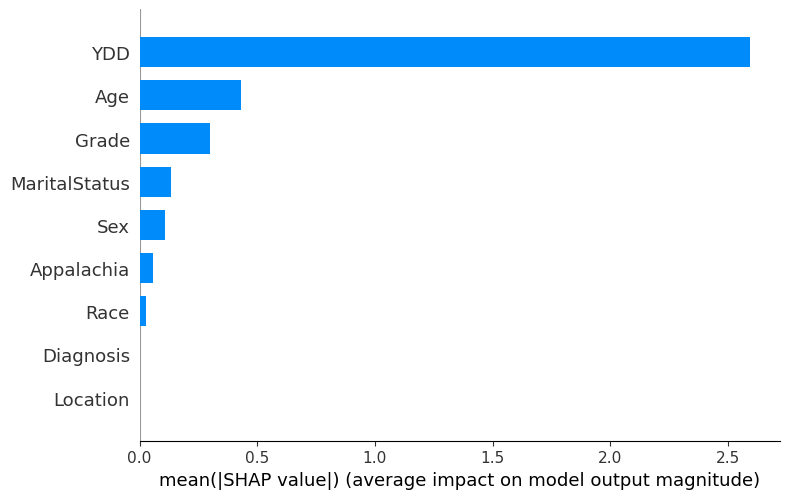

In [228]:
# Generating SHAP plots for the visualizing the model.
explainer = shap.TreeExplainer(fp_xgb_opt)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot using Bar Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.title("SHAP Feature Importance")
plt.tight_layout()
plt.savefig("shap_feature_importance.png")
plt.close()

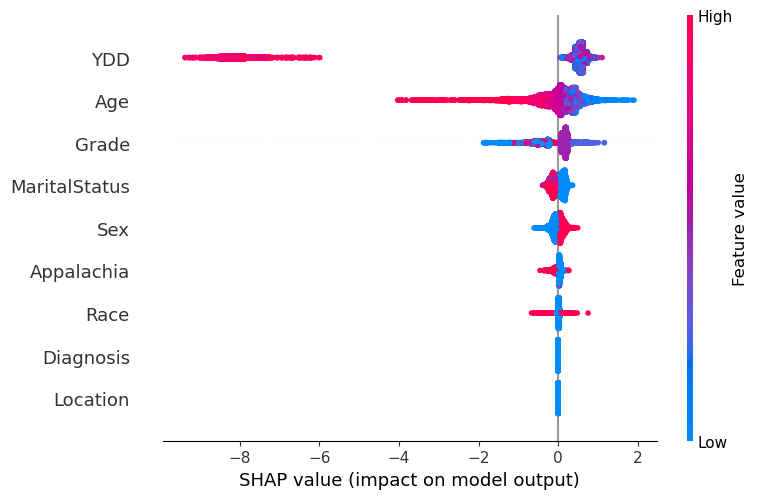

In [229]:
# SHAP summary plot using Dot Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)
plt.title("SHAP Summary Plot")
plt.tight_layout()
plt.savefig("shap_summary_plot.png")
plt.close()

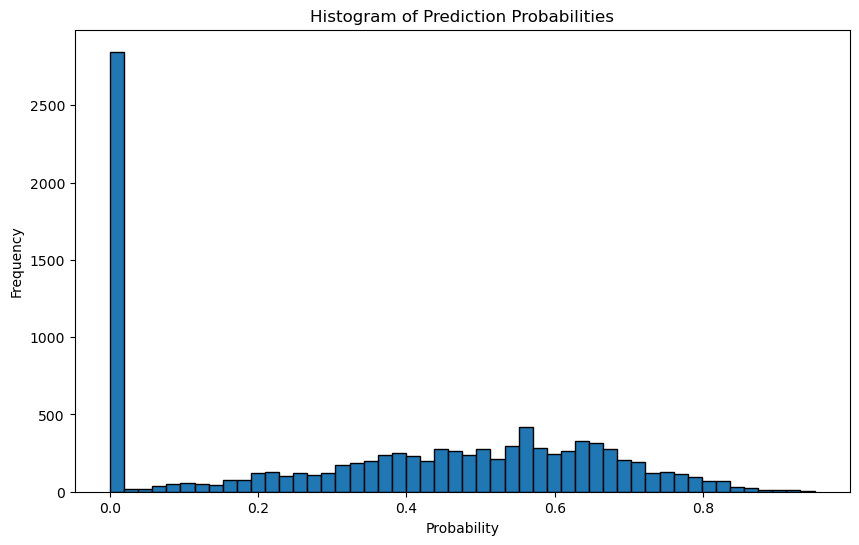

In [230]:
# Generate histogram of prediction probabilities
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba_opt, bins=50, edgecolor='black')
plt.title("Histogram of Prediction Probabilities")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()
plt.savefig("prediction_probabilities_histogram.png")
plt.close()

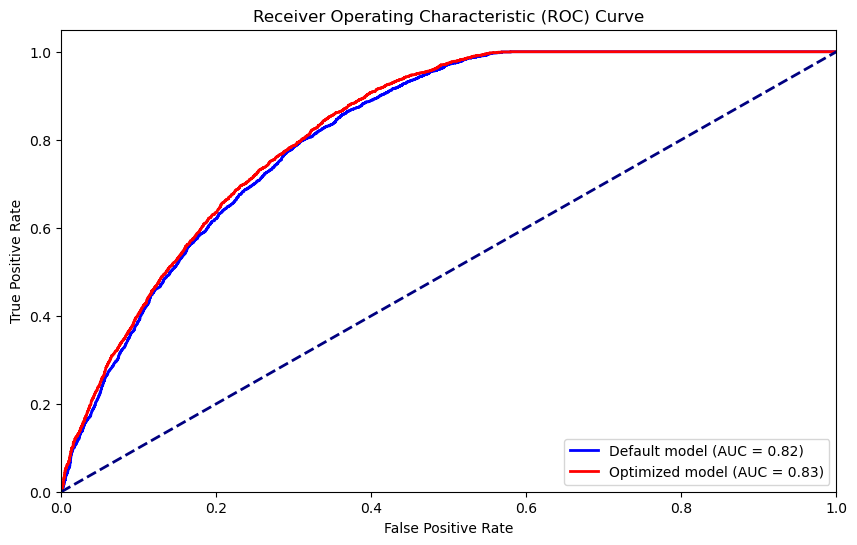

In [231]:
# Generate ROC curve plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_default, tpr_default, color='blue', lw=2, label=f'Default model (AUC = {roc_auc_default:.2f})')
plt.plot(fpr_opt, tpr_opt, color='red', lw=2, label=f'Optimized model (AUC = {roc_auc_opt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
plt.savefig("roc_curve.png")
plt.close()

In [232]:
# Print results
print(f"Default Model Accuracy: {accuracy_default:.4f}")
print(f"Optimized Model Accuracy: {accuracy_opt:.4f}")
print(f"Default Model AUC: {roc_auc_default:.4f}")
print(f"Optimized Model AUC: {roc_auc_opt:.4f}")
print(f"P-value: {p_value:.4f}")

Default Model Accuracy: 0.7358
Optimized Model Accuracy: 0.7424
Default Model AUC: 0.8201
Optimized Model AUC: 0.8271
P-value: 0.0000
